In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
Birds_df = pd.read_csv('../../ArewaDS-Machine-Learning-Assignments/week6-cluster/new_birds.csv')
Birds_df.head()

,Unnamed: 0,Name,category,family,genus,conservationStatus,aveWingLength,averageBodyMass,aveWingSpan
0,0,Black-bellied whistling-duck,Ducks/Geese/Waterfowl,Anatidae,Dendrocygna,LC,85.0,836.0,85.0
1,1,Fulvous whistling-duck,Ducks/Geese/Waterfowl,Anatidae,Dendrocygna,LC,89.0,881.0,89.0
2,2,Snow goose,Ducks/Geese/Waterfowl,Anatidae,Anser,LC,150.0,3050.0,150.0
3,3,Ross's goose,Ducks/Geese/Waterfowl,Anatidae,Anser,LC,114.5,1316.5,114.5
4,4,Greater white-fronted goose,Ducks/Geese/Waterfowl,Anatidae,Anser,LC,147.5,2620.0,147.5


In [283]:
#df = Birds_df['averageBodyMass'].sort_values
df = Birds_df[(Birds_df['averageBodyMass']  < 5)]
df

,Unnamed: 0,Name,category,family,genus,conservationStatus,aveWingLength,averageBodyMass,aveWingSpan
80,80,Ruby-throated hummingbird,Hummingbirds,Trochilidae,Archilochus,LC,9.5,4.000,9.5
81,81,Anna's hummingbird,Hummingbirds,Trochilidae,Calypte,LC,12.0,4.500,12.0
82,82,Costa's hummingbird,Hummingbirds,Trochilidae,Calypte,LC,11.0,3.135,11.0
83,83,Calliope hummingbird,Hummingbirds,Trochilidae,Selasphorus,LC,11.0,2.500,11.0
84,84,Rufous hummingbird,Hummingbirds,Trochilidae,Selasphorus,NT,11.0,3.500,11.0


Let explore and get some information about the dataframe, calling info():

In [7]:
Birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          443 non-null    int64  
 1   Name                443 non-null    object 
 2   category            443 non-null    object 
 3   family              443 non-null    object 
 4   genus               443 non-null    object 
 5   conservationStatus  443 non-null    object 
 6   aveWingLength       443 non-null    float64
 7   averageBodyMass     443 non-null    float64
 8   aveWingSpan         443 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.3+ KB


In [8]:
Birds_df.describe()

,Unnamed: 0,aveWingLength,averageBodyMass,aveWingSpan
count,443.000000,443.000000,443.000000,443.000000
mean,221.000000,63.041196,497.474007,63.041196
std,128.027341,115.411052,1199.837458,115.411052
min,0.000000,9.500000,2.500000,9.500000
25%,110.500000,24.000000,22.650000,24.000000
50%,221.000000,39.500000,73.000000,39.500000
75%,331.500000,77.250000,462.500000,77.250000
max,442.000000,2050.000000,11750.000000,2050.000000


Let check the missing values

In [9]:
Birds_df.isnull().sum()

Unnamed: 0            0
Name                  0
category              0
family                0
genus                 0
conservationStatus    0
aveWingLength         0
averageBodyMass       0
aveWingSpan           0
dtype: int64

Let's Try for Clustering Birds category

Text(0.5, 1.0, 'Top Category of Minnesota Birds ')

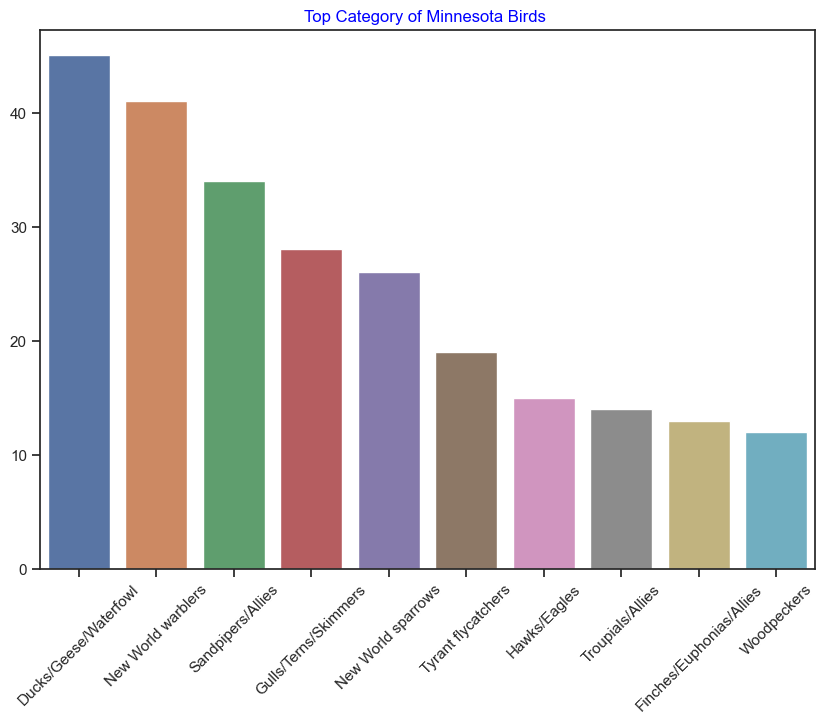

In [234]:
## Let visualise the first ten rows of the data based on category
top = Birds_df['category'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top[:10].index,y=top[:10].values)
plt.xticks(rotation=45)
plt.title('Top Category of Minnesota Birds ',color = 'blue')

Text(0.5, 1.0, 'Top genres')

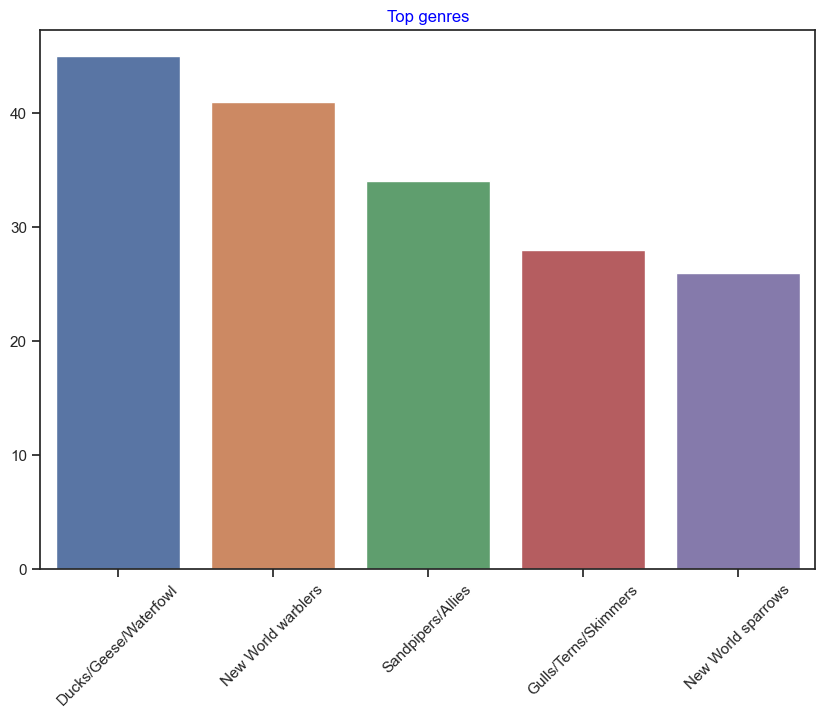

In [101]:
top5 = Birds_df['category'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top5[:5].index,y=top5[:5].values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Text(0.5, 1.0, 'Top genres')

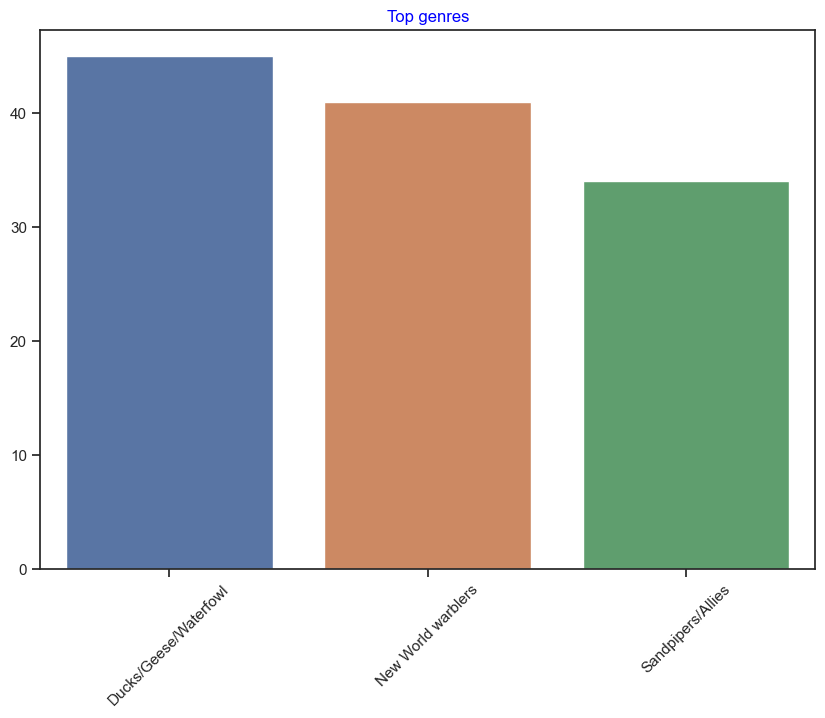

In [185]:
df1 = Birds_df[(Birds_df['category'] == 'Ducks/Geese/Waterfowl') | (Birds_df['category'] == 'New World warblers') | (Birds_df['category'] == 'Sandpipers/Allies')]
top = df1['category'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

Let's do a quick test to see if the data correlates in any particularly strong way:

In [187]:
df1 = df1.drop(['Unnamed: 0', 'Name', 'family', 'genus', 'conservationStatus'], axis=1)
#df1=df1.iloc[:, 0:]


C:\Users\Abdulrahman Yusuf\AppData\Local\Temp\ipykernel_6368\2819390947.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df1.corr()


<Axes: >

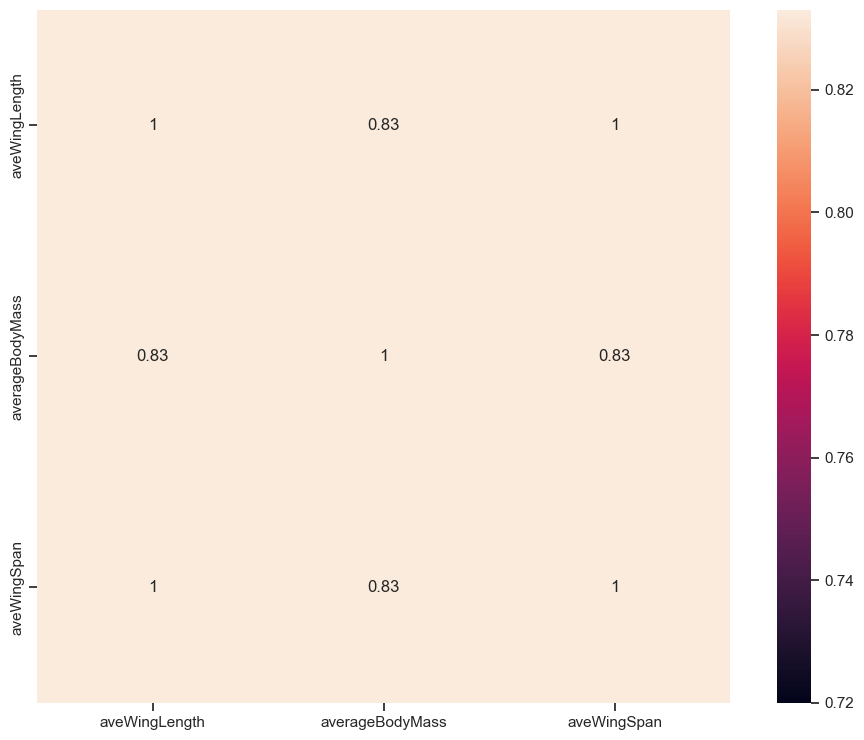

In [188]:
corrmat = df1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)

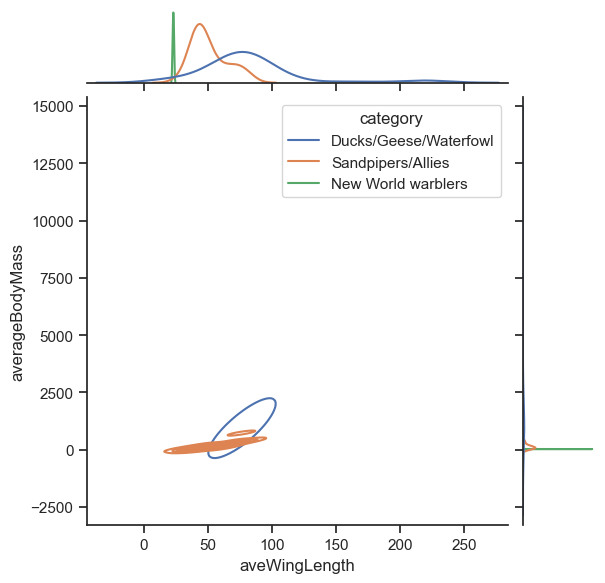

In [287]:
sns.set_theme(style="ticks")

g = sns.jointplot(
   df1,
    x="aveWingLength", y="averageBodyMass", hue="category",
    kind="kde"
)

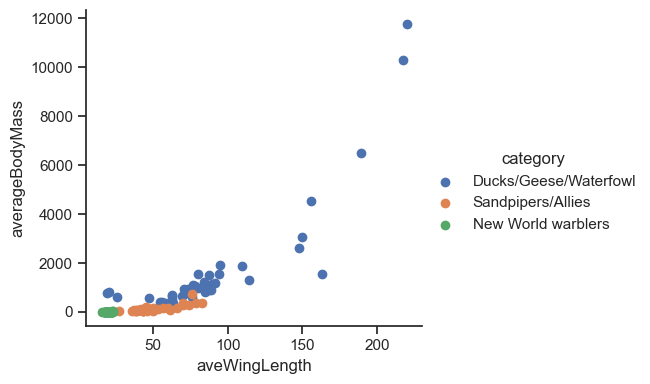

In [189]:
sns.FacetGrid(df1, hue="category", height=4, aspect= 1.2) \
   .map(plt.scatter, "aveWingLength", "averageBodyMass") \
   .add_legend()

Let's try for Clustering  Birds Genus

Text(0.5, 1.0, 'Top Birds based on Genus')

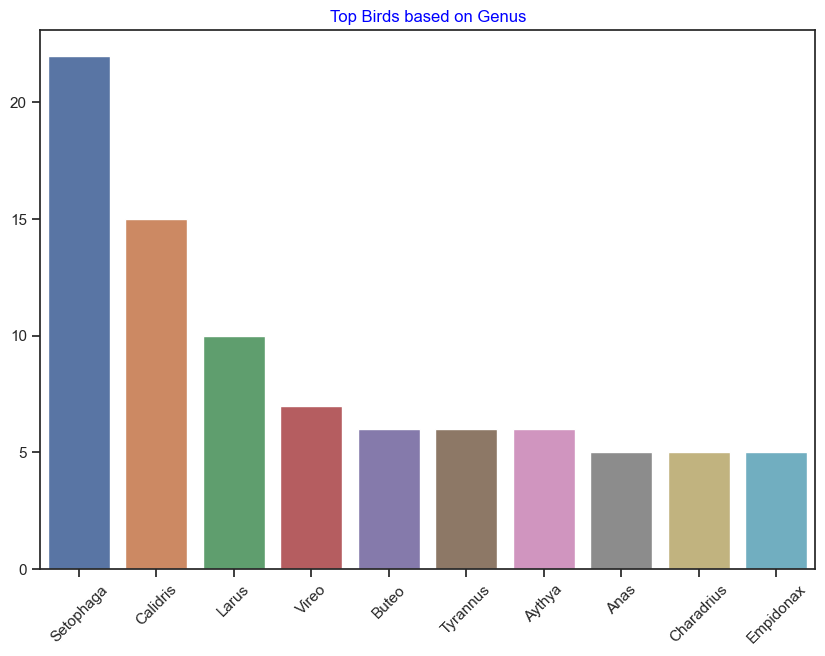

In [298]:
top2 = Birds_df['genus'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top2[:10].index,y=top2[:10].values)
plt.xticks(rotation=45)
plt.title('Top Birds based on Genus',color = 'blue')

Text(0.5, 1.0, 'Top Birds Genuss')

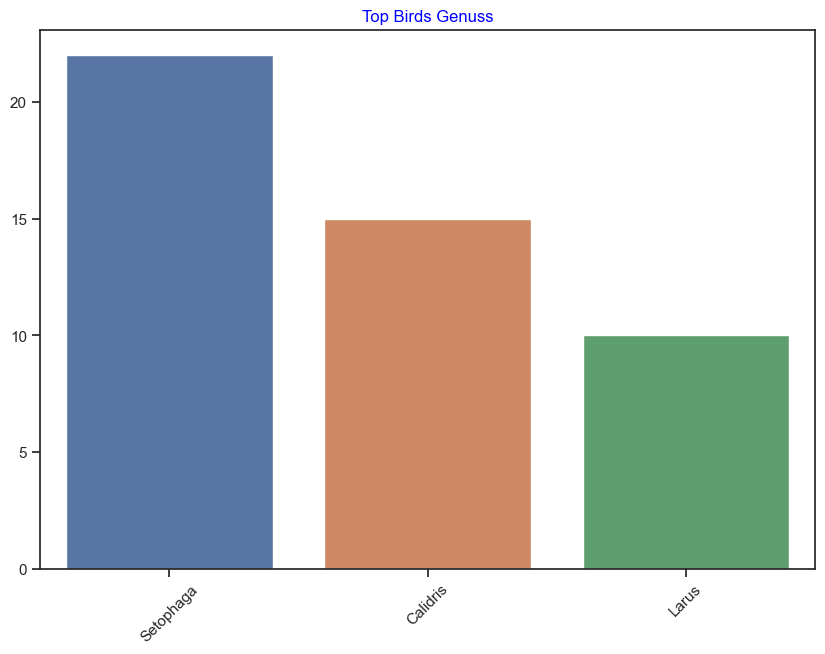

In [305]:
#Visualising  only first top three rows of genus
df2 = Birds_df[(Birds_df['genus'] == 'Setophaga') | (Birds_df['genus'] == 'Calidris') | (Birds_df['genus'] == 'Larus')]
top = df2['genus'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top Birds Genuss',color = 'blue')

In [306]:
df2 = df2.drop(['Unnamed: 0', 'Name', 'category', 'family', 'conservationStatus'], axis=1)

In [301]:
#df2=df2.iloc[:, 4:]

Let's make a quick test to see if the data correlates in any particularly strong way:

C:\Users\Abdulrahman Yusuf\AppData\Local\Temp\ipykernel_6368\2098309233.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df2.corr()


<Axes: >

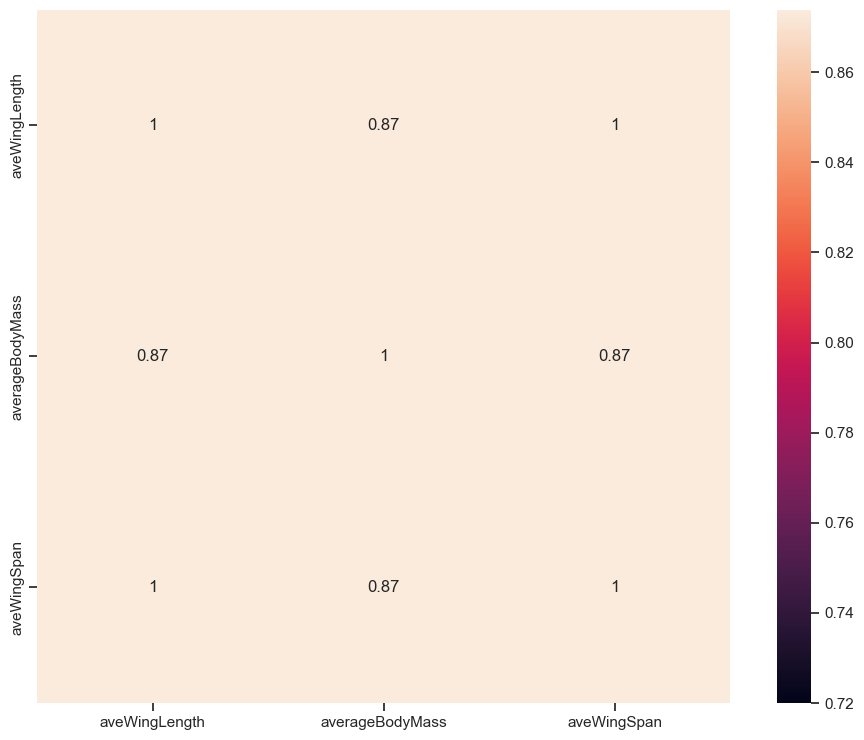

In [307]:
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)

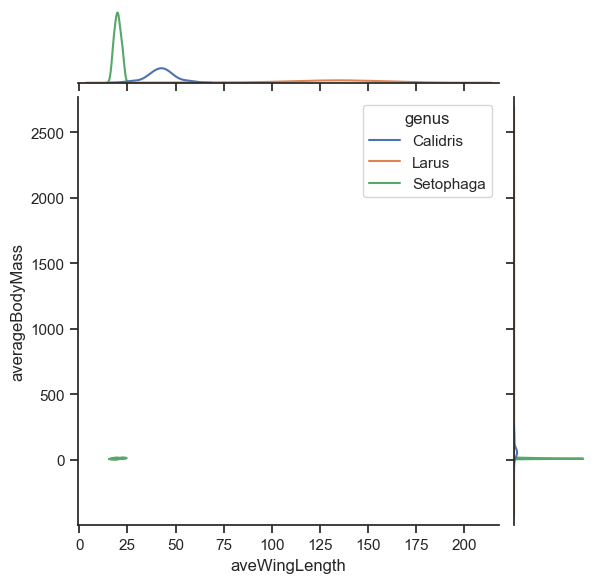

In [308]:
sns.set_theme(style="ticks")

g = sns.jointplot(
   df2,
    x="aveWingLength", y="averageBodyMass", hue="genus",
    kind="kde"
)

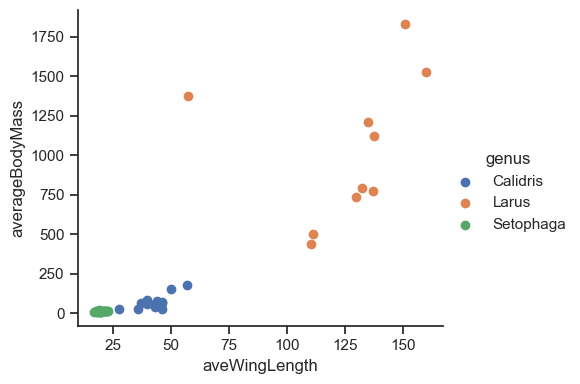

In [220]:
sns.FacetGrid(df2, hue="genus", height=4, aspect= 1.2) \
   .map(plt.scatter, "aveWingLength", "averageBodyMass") \
   .add_legend()

Test for Clusring Birds Family

Text(0.5, 1.0, 'Top Birds Based on Family')

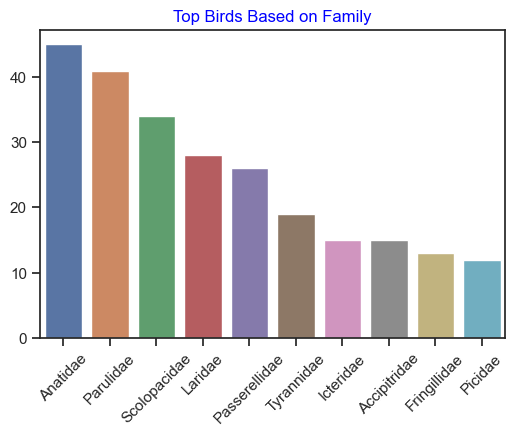

In [238]:
#Visualising  only first top Ten rows of genus
topfmily = Birds_df['family'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=topfmily[:10].index,y=topfmily[:10].values)
plt.xticks(rotation=45)
plt.title('Top Birds Based on Family',color = 'blue')

Text(0.5, 1.0, 'Top Three Birds Family')

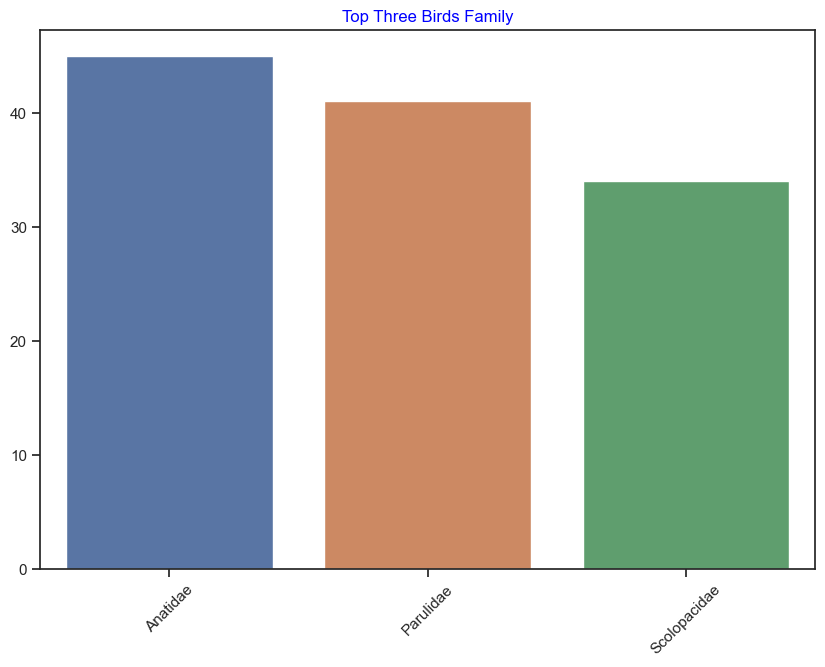

In [261]:
#Let's filter and Visualise only first top three birds' family
df3 = Birds_df[(Birds_df['family'] == 'Anatidae') | (Birds_df['family'] == 'Parulidae') | (Birds_df['family'] == 'Scolopacidae')]
#df1 = df1[(df1['popularity'] > 0)]
top = df3['family'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top Three Birds Family',color = 'blue')

In [254]:
df3 = df3.drop(['Unnamed: 0', 'Name',  'genus', 'conservationStatus'], axis=1)

In [228]:
#df3 = df3[(df3['averageBodyMass'] > 10000) & (df3['averageBodyMass'] < 2000)]

In [247]:
#df3=df3.iloc[:, 4:]

C:\Users\Abdulrahman Yusuf\AppData\Local\Temp\ipykernel_6368\2476859253.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df3.corr()


<Axes: >

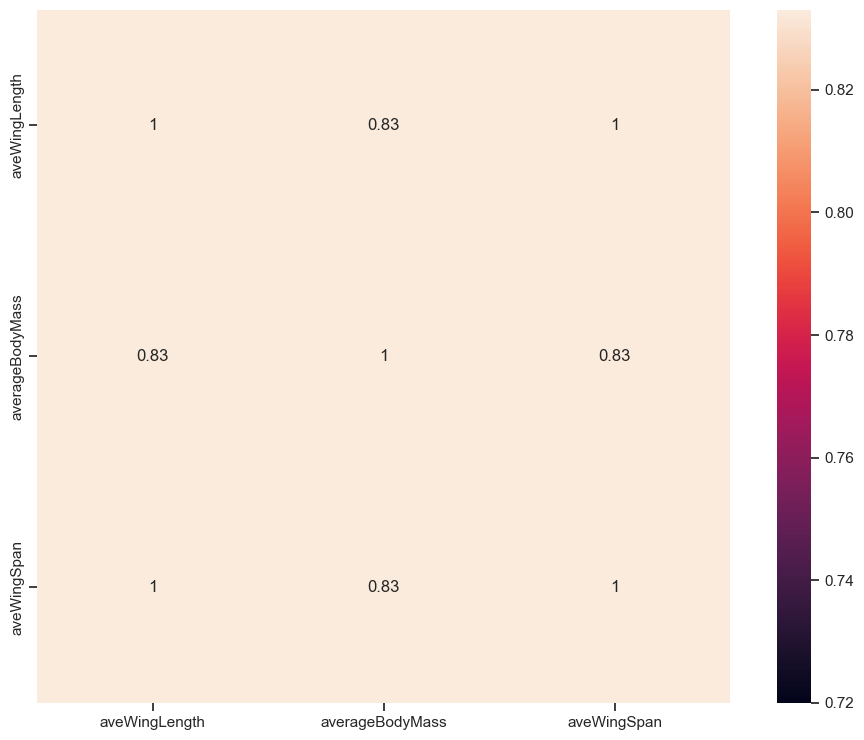

In [255]:
corrmat = df3.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)

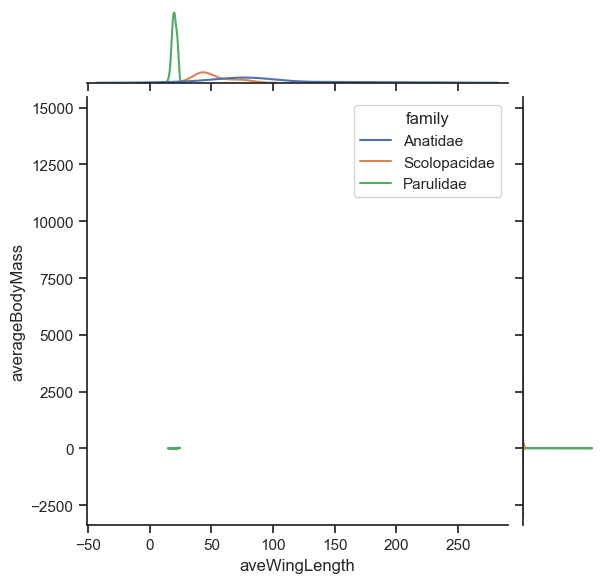

In [309]:
sns.set_theme(style="ticks")

g = sns.jointplot(
   df3,
    x="aveWingLength", y="averageBodyMass", hue="family",
    kind="kde"
)

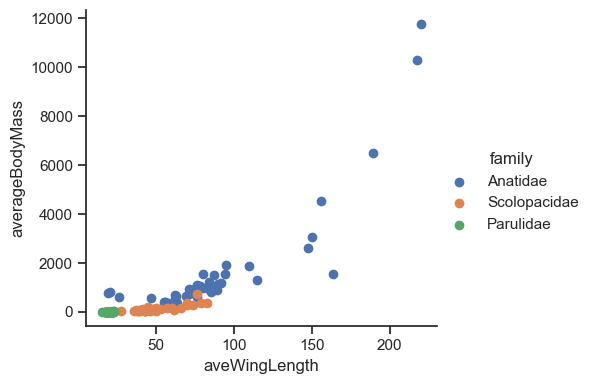

In [256]:
sns.FacetGrid(df3, hue="family", height=4, aspect= 1.2) \
   .map(plt.scatter, "aveWingLength", "averageBodyMass") \
   .add_legend()

Let's Try for Birds Conservation Staus

Text(0.5, 1.0, 'Top Birds Consrvation Status')

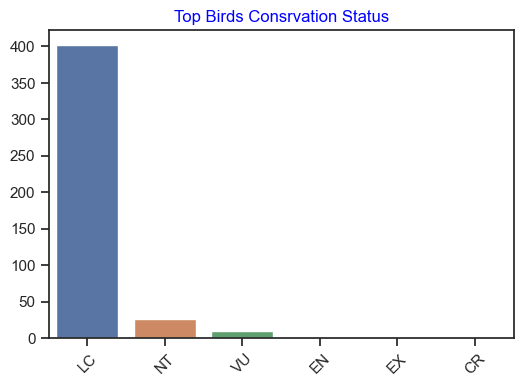

In [284]:
#Let's Visualise the whole six conservationon status
fd4 = Birds_df['conservationStatus'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=fd4[:6].index,y=fd4[:6].values)
plt.xticks(rotation=45)
plt.title('Top Birds Consrvation Status',color = 'blue')

By far, the top three genres dominate this dataset. Let's concentrate on afro dancehall, afropop, and nigerian pop, additionally filter the dataset to remove anything with a 0 popularity value (meaning it was not classified with a popularity in the dataset and can be considered noise for our purposes):

Text(0.5, 1.0, 'Top Birds conservation Status')

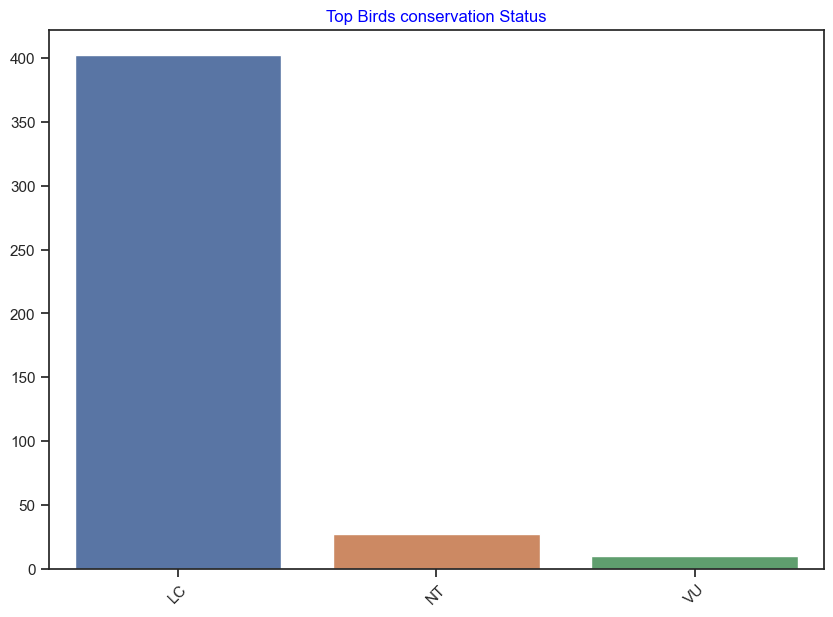

In [263]:
#Let's filter and Visualise only first top three birds' family
df4 = Birds_df[(Birds_df['conservationStatus'] == 'LC') | (Birds_df['conservationStatus'] == 'NT') | (Birds_df['conservationStatus'] == 'VU')]
df1 = df1[(df1['averageBodyMass'] >20)]
top = df4['conservationStatus'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top Birds conservation Status',color = 'blue')

In [264]:
df4 = df4.iloc[:, 5:]
df4

,conservationStatus,aveWingLength,averageBodyMass,aveWingSpan
0,LC,85.0,836.00,85.0
1,LC,89.0,881.00,89.0
2,LC,150.0,3050.00,150.0
3,LC,114.5,1316.50,114.5
4,LC,147.5,2620.00,147.5
...,...,...,...,...
438,LC,27.5,28.75,27.5
439,LC,22.0,15.50,22.0
440,LC,20.5,16.30,20.5
441,LC,22.0,16.00,22.0


Let's make a quick test to see if the data correlates in any particularly strong way:

C:\Users\Abdulrahman Yusuf\AppData\Local\Temp\ipykernel_6368\459715121.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df4.corr()


<Axes: >

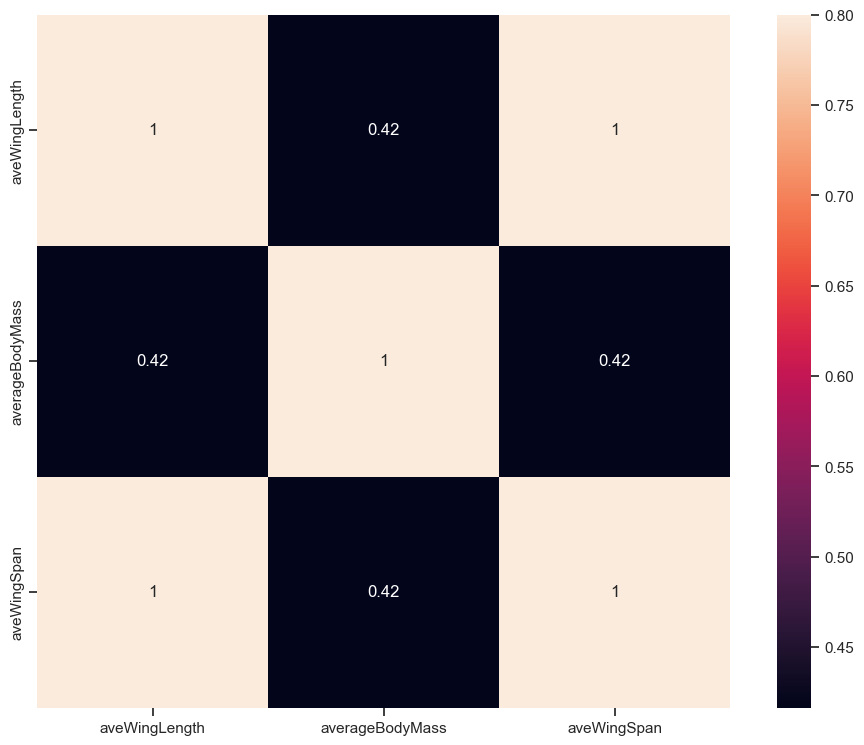

In [170]:
corrmat = df4.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)

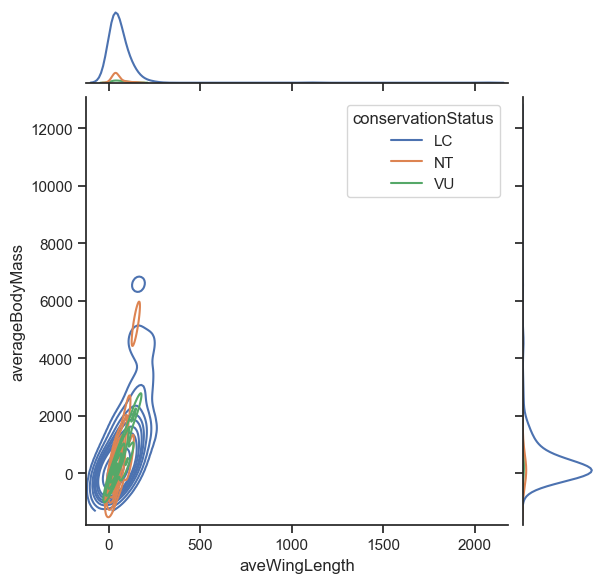

In [310]:
sns.set_theme(style="ticks")

g = sns.jointplot(
   df4,
    x="aveWingLength", y="averageBodyMass", hue="conservationStatus",
    kind="kde"
)

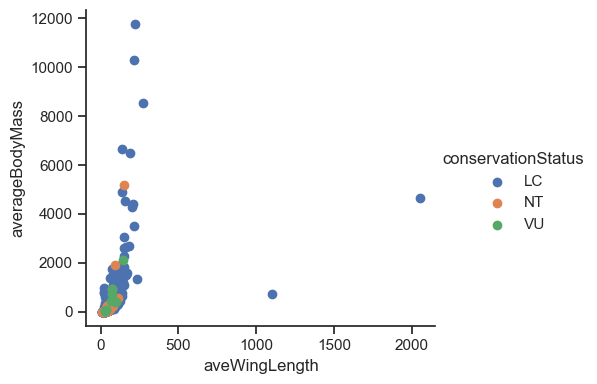

In [152]:
sns.FacetGrid(df4, hue="conservationStatus", height=4, aspect= 1.2) \
   .map(plt.scatter, "aveWingLength", "averageBodyMass") \
   .add_legend()

In [286]:
B = Birds_df['category'].value_counts()
B

Ducks/Geese/Waterfowl              45
New World warblers                 41
Sandpipers/Allies                  34
Gulls/Terns/Skimmers               28
New World sparrows                 26
Tyrant flycatchers                 19
Hawks/Eagles                       15
Troupials/Allies                   14
Finches/Euphonias/Allies           13
Woodpeckers                        12
Thrushes/Allies                    11
Owls                               11
Herons/Egrets/Bitterns             11
Cardinals/Allies                   11
Pheasants/Grouse/Allies             9
Pigeons/Doves                       8
Rails/Gallinules/Coots              8
Hummingbirds                        7
Plovers/Lapwings                    7
Wrens                               7
Swallows                            7
Vireos/Shrike-babblers/Erpornis     7
Grebes                              6
Crows/Jays/Magpies                  6
Falcons /Caracaras                  6
Longspurs/Snow buntings             5
Mockingbirds